In [ ]:
!pip install open3d -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd

In [ ]:
# Definition of directories

W_BAND_FOLDER = '/content/drive/MyDrive/W_band_radar'
X_BAND_FOLDER = '/content/drive/MyDrive/X_band_radar'

In [ ]:
def analyze_radar_folder(folder_path, radar_name):
    print(f"--- Analyzing {radar_name} ---")

    intensities = []
    image_shapes = []

    for filename in sorted(os.listdir(folder_path)):
        if filename.lower().endswith('.png'):
            file_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(file_path).convert('L')  # Convert to grayscale
                img_np = np.array(img)

                # Store metadata
                intensities.append(img_np.flatten())
                image_shapes.append(img_np.shape)

                # Display one sample image
                if len(intensities) == 1:
                    plt.figure(figsize=(5, 10))
                    plt.title(f"Sample Image - {radar_name}")
                    plt.imshow(img_np, cmap='gray')
                    plt.axis('off')
                    plt.show()

            except Exception as e:
                print(f"Failed to process {filename}: {e}")

    # Flatten all intensity values
    all_intensities = np.concatenate(intensities)

    # Plot pixel intensity distribution
    plt.figure(figsize=(8, 4))
    plt.title(f'{radar_name} - Pixel Intensity Distribution')
    sns.histplot(all_intensities, bins=100, kde=True, color='black')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Report summary statistics
    stats = {
        'Radar': radar_name,
        'Num Images': len(image_shapes),
        'Image Height (mean)': np.mean([s[0] for s in image_shapes]),
        'Image Width (mean)': np.mean([s[1] for s in image_shapes]),
        'Pixel Intensity (min)': np.min(all_intensities),
        'Pixel Intensity (max)': np.max(all_intensities),
        'Pixel Intensity (mean)': np.mean(all_intensities),
        'Pixel Intensity (std)': np.std(all_intensities)
    }

    stats_df = pd.DataFrame([stats])
    print(stats_df.to_string(index=False))

    return stats_df

--- Analyzing W-Band Radar ---


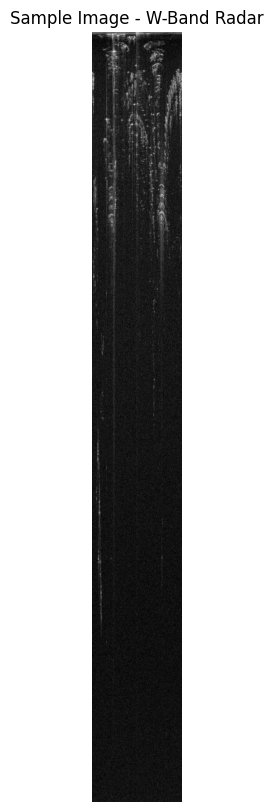

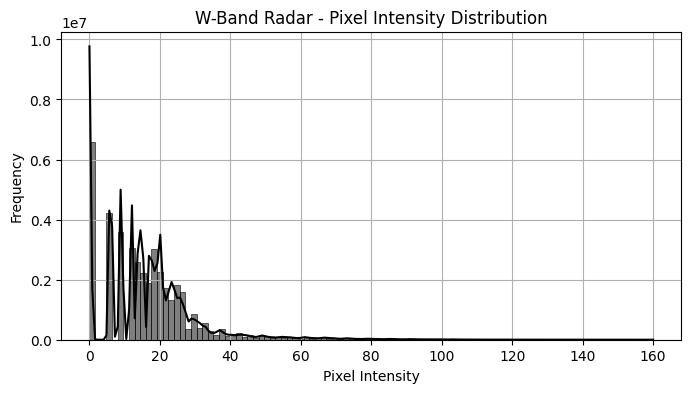

       Radar  Num Images  Image Height (mean)  Image Width (mean)  Pixel Intensity (min)  Pixel Intensity (max)  Pixel Intensity (mean)  Pixel Intensity (std)
W-Band Radar          30               3424.0               400.0                      0                    160               16.539323              14.312377
--- Analyzing X-Band Radar ---


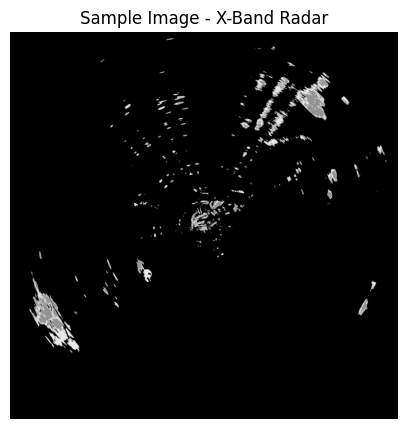

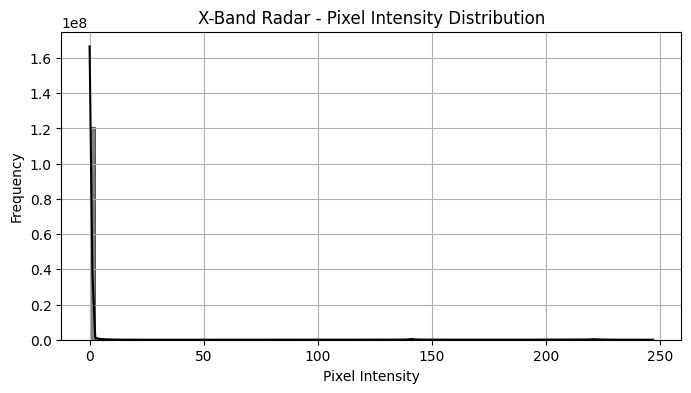

       Radar  Num Images  Image Height (mean)  Image Width (mean)  Pixel Intensity (min)  Pixel Intensity (max)  Pixel Intensity (mean)  Pixel Intensity (std)
X-Band Radar          30               2048.0              2048.0                      0                    247                5.081567              29.559912


In [ ]:
# Run EDA for both radar types
df_w = analyze_radar_folder(W_BAND_FOLDER, 'W-Band Radar')
df_x = analyze_radar_folder(X_BAND_FOLDER, 'X-Band Radar')

The W-Band radar images display high-resolution vertical scans with intense reflection activity near the radar platform, tapering off with distance. The pixel intensity histogram confirms that most pixels are low-reflective or dark, with only a small percentage exhibiting strong reflections. This distribution reflects the sparse and noisy nature typical of radar returns in maritime environments. Objects such as vessels or infrastructure produce bright arcs and streaks near the top of the image, consistent across the dataset's average size of 3424×400 pixels.


The X-Band radar image shows a circular scanning pattern typical of maritime or surveillance radar systems, where bright patches represent strong reflectors like vessels or landmasses against a predominantly dark background. Statistically, the X-Band radar data consists of 30 high-resolution square images (2048×2048 pixels), with pixel intensities ranging from 0 to 247. However, the mean intensity is low (~5.08) with a high standard deviation (~29.56), indicating a sparse distribution of strong reflectors among a largely inactive background. The histogram confirms this with an extreme right-skew, where most pixel values are clustered near zero and only a small fraction show high intensity. Compared to the W-Band radar, which has narrower, taller images and a more evenly distributed intensity profile (mean ~16.5, std ~14.3), the X-Band provides denser spatial coverage but captures fewer consistent returns across the image. Overall, the X-Band radar is better suited for detecting and localizing discrete objects in wide areas, while W-Band excels in tracking fine-grained motion or height-based changes over time.

In [ ]:
summary_df = pd.concat([df_w, df_x], ignore_index=True)
print("\n--- Summary of Radar Image Statistics ---")
print(summary_df.to_string(index=False))


--- Summary of Radar Image Statistics ---
       Radar  Num Images  Image Height (mean)  Image Width (mean)  Pixel Intensity (min)  Pixel Intensity (max)  Pixel Intensity (mean)  Pixel Intensity (std)
W-Band Radar          30               3424.0               400.0                      0                    160               16.539323              14.312377
X-Band Radar          30               2048.0              2048.0                      0                    247                5.081567              29.559912
